<h1 style="color:rgb(0,0,255);">Aprendizaje Profundo</h1>

<h1 style="color:rgb(255,0,0);">Predicción del valor de una acción a tres días. Apple (LSTM)</h1>

<h2 style="color:rgb(0,0,255);">Profesores</h2>
<ol>
    <li>Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co</li>
    <li>Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com</li>
    <li>Campo Elías Pardo Turriago, cepardot@unal.edu.co</li>
</ol>

<h2 style="color:rgb(0,0,255);">Asesora Medios y Marketing digital</h2>
<ol>
    <li>Maria del Pilar Montenegro, pmontenegro88@gmail.com</li>
</ol>

<h2 style="color:rgb(0,0,255);">Asistentes</h2>
<ol>
    <li>Oleg Jarma, ojarmam@unal.edu.co</li>
    <li>Laura Lizarazo, ljlizarazore@unal.edu.co</li>
</ol>

<h2 style="color:rgb(0,0,255);">Referencias</h2>
<ol>
    <li>Introducción a Redes LSTM</li>
    <li>Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python</li>
    <li>Dive into Deep Learnig</li>
    <li>Understanding LSTM Networks</li>
    <li>Ralf C. Staudemeyer and Eric Rothstein Morris,Understanding LSTM a tutorial into Long Short-Term Memory Recurrent Neural Networks, arxiv, September 2019</li>
    <li>Karpathy, The Unreasonable Effectiveness of Recurrent Neural Networks</li>
    <li>Anton Lucanus, Making Automation More Efficient by Learning from Historical Trade Data, 8:43 AM, January 7, 2020</li>
    <li>https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/</li>
    <li>https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=1</li>
    <li>https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653</li>
    <li>https://github.com/llSourcell/Reinforcement_Learning_for_Stock_Prediction/blob/master/README.md</li>
</ol>

<h2 style="color:rgb(0,0,255);">Contenido</h2>
<ol>

- Introducción
- Importar las librería requeridas
- Funciones-para-graficar-predicciones
- Lectura de los datos
- Extrae datos para la serie que se desea predecir-close
- Visualización de la serie precio al cierre
- Preparación de los datos para el entrenamiento
- Crea el modelo LSTM
- Lee modelo preentrenado a un día
- Predicciones
- Guarda el modelo entrenado
- Intervalos de confianza. TO DO

<h2 style="color:rgb(0,0,255);">Importar las librerias requeridas</h2>
<ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos Pytorch

import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 


Estos datos corresponden a la empresa Apple. Son 3019 datos que corresponden a observaciones del precio de la acción, el número de transacciones de la acción (compra-venta). Los datos son diarios (dias hábiles o comerciales). Están entre el 3 de enero de 2006 hasta el 1 de enero de 2018.

la columna Date es la fecha, Open es el valor de acción a la apertura del mercado, High el valor más alto alcanzado en el día, Low el valor más bajo del día, Close el valor al cierre, Volume es el volúmenes de acciones transadas en el día y Name es el código de identificación de la empresa, Apple en este caso.

Los datos puede ser bajados directamente de Kaggle

<h2 style="color:rgb(0,0,255);">Lectura de los datos</h2>
<ol>

In [2]:
#reading from a local file
df = pd.read_csv('../input/stock-time-series-20050101-to-20171231/AAPL_2006-01-01_to_2018-01-01.csv')

In [3]:
# looking at the first five rows of the data
print('\n Shape of the data:')
print(df.shape)
df.head()


 Shape of the data:
(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


Vamos a cambiar el índice de los datos. Tomaremos la fecha como indice: df.index. Los datos se reordenan para invertir la tabla, debido a que los datos contienen las observaciones más recientes en la parte superior de la tabla.

<h2 style="color:rgb(0,0,255);">Extrae datos para la serie que se desea predecir-close</h2>
<ol>

In [4]:
#creating dataframe with date and the target variable

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
# df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(df[['Date', 'Close']])
#
#setting index
data.index = data.Date
data.drop('Date', axis=1, inplace=True)
data.head()

,Close
Date,
2006-01-03,10.68
2006-01-04,10.71
2006-01-05,10.63
2006-01-06,10.90
2006-01-09,10.86


<h2 style="color:rgb(0,0,255);">Visualización de la serie precio al cierre</h2>
<ol>

In [5]:
# plot
len_data = len(data)
len_train = int(len_data*0.8) # 80%  = 3019
len_test = len_data- len_train # 20% = 2415
print (len_data, '=', len_train, '+',len_test)

3019 = 2415 + 604


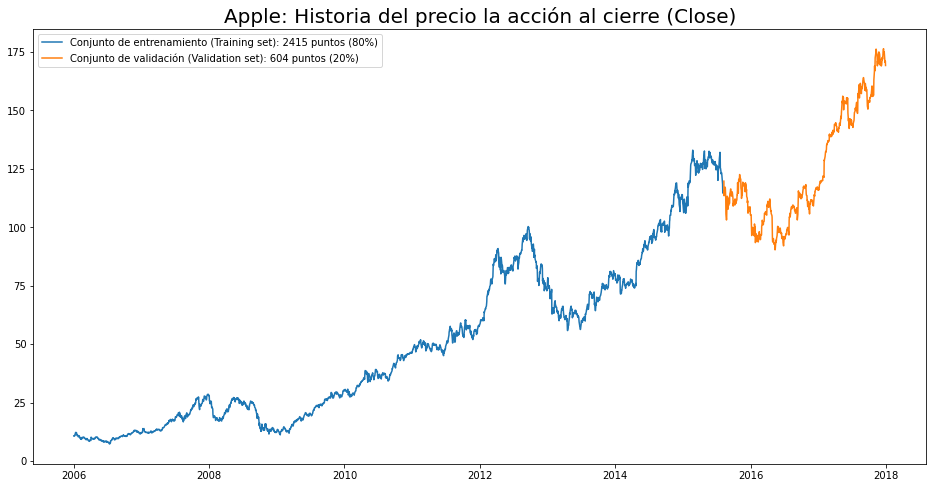

In [6]:
plt.figure(figsize=(16,8))
plt.plot(data[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (80%)'.format(len_train))
plt.plot(data['Close'][len_train:], label='Conjunto de validación (Validation set): {} puntos (20%)'.format(len_test)) #248 data
plt.title("Apple: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

<h2 style="color:rgb(0,0,255);">Preparación de los datos para el entrenamiento de la red LSTM</h2>
Para evitar problemas con las tendencias y para mejorar la estimación (entrenamiento) los datos se van a transformar a la escala . Para las predicciones se utiliza la transformación inversa.

### Primero extrae los valores y se crea el objeto MinMaxScaler

In [39]:
#creating train and test sets
dataset = data.values


# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = np.array(scaler.fit_transform(dataset))
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)
# dataset = pd.DataFrame(scaled_data,index=data.index, columns=['serie'])

In [8]:
dataset.shape

(3019,)

### Crea datos de entrenamiento

La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 5 datos (la predicción a partir de esos "time_step" datos se hace para los siguentes 5 días). Se conformará de esta forma el set de entrenamiento
<ol>
    <li>Número de datos consecutivos para entrenamiento: time_step = 60. </li>
    <li>Días a predecir: days = 1 </li>
</ol>

### Función para crear los datos entrenamiento

In [9]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la ventana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])

    return np.array(data), np.array(labels)

Se coloca una semilla para garantizar reproductibidad

In [12]:
import random
random.seed(100)

In [13]:
#
# hiperparámetros para crear las secuencias
past_history = 60 # tamaño secuencias de entrada
future_target = 3 # días adelante
TRAIN_SPLIT = int(len_data*0.8) #2415: nuḿero de datos entreno

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, 0, TRAIN_SPLIT,
                                           past_history,
                                           future_target)
#
#secuencias de validación
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT, None,
                                       past_history,
                                       future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2415
(2355, 60, 1)
(2355,)
(541, 60, 1)
(541,)


In [18]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

In [24]:
X_train_tensors_final.shape

torch.Size([2355, 1, 60])

<h2 style="color:rgb(0,0,255);">Crea el modelo LSTM</h2>
Omitimos esta sección. Usaremos el modelo entrenado a un día

In [34]:
num_epochs = 30 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 60 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [25]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[0:1]) #our lstm class 


criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

## Entrena el modelo

In [35]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 1 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.04121
Epoch: 1, loss: 0.04121
Epoch: 2, loss: 0.04121
Epoch: 3, loss: 0.04121
Epoch: 4, loss: 0.04121
Epoch: 5, loss: 0.04121
Epoch: 6, loss: 0.04121
Epoch: 7, loss: 0.04121
Epoch: 8, loss: 0.04121
Epoch: 9, loss: 0.04121
Epoch: 10, loss: 0.04121
Epoch: 11, loss: 0.04121
Epoch: 12, loss: 0.04121
Epoch: 13, loss: 0.04121
Epoch: 14, loss: 0.04121
Epoch: 15, loss: 0.04121
Epoch: 16, loss: 0.04121
Epoch: 17, loss: 0.04121
Epoch: 18, loss: 0.04121
Epoch: 19, loss: 0.04121
Epoch: 20, loss: 0.04121
Epoch: 21, loss: 0.04121
Epoch: 22, loss: 0.04121
Epoch: 23, loss: 0.04121
Epoch: 24, loss: 0.04121
Epoch: 25, loss: 0.04121
Epoch: 26, loss: 0.04121
Epoch: 27, loss: 0.04121
Epoch: 28, loss: 0.04121
Epoch: 29, loss: 0.04121


<h2 style="color:rgb(0,0,255);">Predicciones</h2>
<ol>

## Prepara los datos de validación

In [31]:
X_test.shape

(541, 60, 1)

## Calcula predicciones

tensor([[[0.6649, 0.6280, 0.6384,  ..., 0.6696, 0.6636, 0.6735]],

        [[0.6280, 0.6384, 0.6378,  ..., 0.6636, 0.6735, 0.6817]],

        [[0.6384, 0.6378, 0.6426,  ..., 0.6735, 0.6817, 0.6783]],

        ...,

        [[0.8688, 0.8632, 0.8682,  ..., 1.0000, 0.9889, 0.9878]],

        [[0.8632, 0.8682, 0.8664,  ..., 0.9889, 0.9878, 0.9917]],

        [[0.8682, 0.8664, 0.8703,  ..., 0.9878, 0.9917, 0.9917]]])

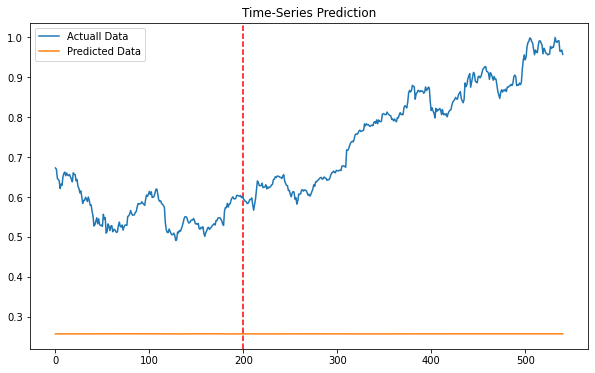

In [77]:
train_predict = lstm1(X_test_tensors_final)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot =y_test


plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

<h2 style="color:rgb(0,0,255);">Guarda el modelo entrenado</h2>
<ol>

In [ ]:
model_01.save('../Datos/modelo_Apple_3_dia.h5')